# Decorrelating your Data and Dimension Reduction

---

In this notebook, we will talk about dimension reduction which is a technique that summarizes and reudce the data using its common occuring patterns. The most common type is principal component analysis (PCA) which is used often to improve the performance of the supervised learning techniques in addition to its application in the unsupervised learning for clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

## Dimension Reduction


Dimension reduction finds patterns in the data and use them to represent the data in a compressed form. This makes computation and storage much more efficient. It also removes the less information noisy features that cause problems for prediction tasks. The most fundemental technique is **P**rincipal **C**omponent **A**nalysis **(PCA)** which is performed in 2 steps: decorrelation and reduction.


PCA rotates the data samples to be aligned with the axes and shift them so that they have mean of 0. And no information is lost.

![](assets/images/pca.png)


`sklearn` has a `PCA` class that has 2 methods:

* `fit()` learns the transformation from given data
* `transform()` applies the learned transformation which can be applied to new unseen samples.

So to use the PCA,

```python
from sklearn.decomposition import PCA

model = PCA()

model.fit(samples)

transformed_samples = model.transform(samples)

print(transformed)
```

In [2]:
wines_df = pd.read_csv("assets/data/wines.csv")
wines_df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's say we have `samples` which is array of 2 features; `total_phenols` and `od280`.

In [3]:
samples = wines_df[["total_phenols", "od280"]].values

In [4]:
from sklearn.decomposition import PCA

model = PCA()

model.fit(samples)

transformed_samples = model.transform(samples)

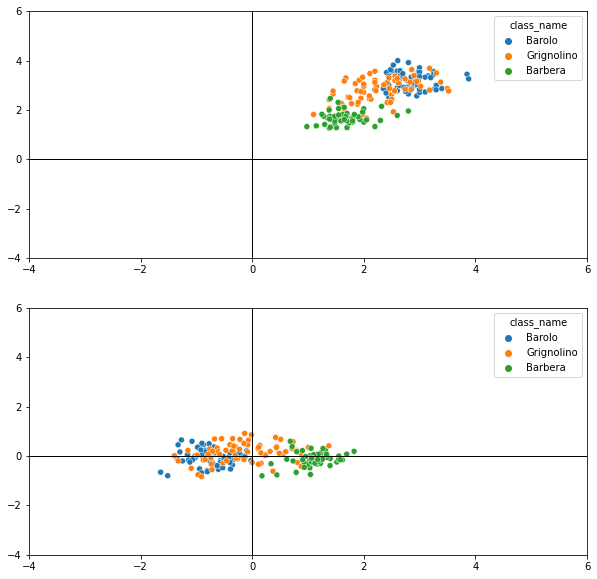

In [12]:
plt.figure(figsize=[10, 10])

plt.subplot(2, 1, 1)

sns.scatterplot(
    x = samples[:, 0],
    y = samples[:, 1],
    hue = wines_df.class_name
)
plt.xlim((-4,6))
plt.ylim((-4,6))
# Draw lines to split quadrants
plt.plot([0,0],[-4,6], linewidth=1, color='black' )
plt.plot([-4,6],[0,0], linewidth=1, color='black' )

plt.subplot(2, 1, 2)
sns.scatterplot(
    x = transformed_samples[:, 0],
    y = transformed_samples[:, 1],
    hue = wines_df.class_name
)
plt.xlim((-4,6))
plt.ylim((-4,6))
# Draw lines to split quadrants
plt.plot([0,0],[-4,6], linewidth=1, color='black' )
plt.plot([-4,6],[0,0], linewidth=1, color='black' )

While the features in the original samples may be correlated. The tranformed features are not. This is why this step is called **decorrelation**. 

We can check linear correlation using **Pearson correlation** which has a value between -1 and 1 where large values in both directions (+ve [0.7] and -ve [-0.7])  means high correlation and small values ([0.1], [-0.1]) means there is very small correlation which be considered as no correlation.

In [6]:
from scipy.stats import pearsonr

x = samples[:, 0]
y = samples[:, 1]
corr, p_val = pearsonr(x, y)
corr

0.6999493647911863

In [7]:
x = transformed_samples[:, 0]
y = transformed_samples[:, 1]
corr, p_val = pearsonr(x, y)
corr

1.231653667943533e-16

In [8]:
model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

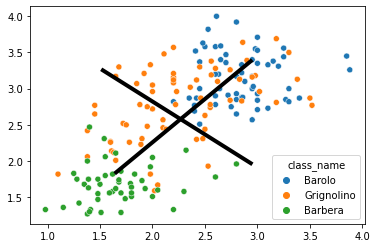

In [9]:
sns.scatterplot(
    x = samples[:, 0],
    y = samples[:, 1],
    hue = wines_df.class_name
)

x = samples[:, 0]
y = samples[:, 1]
plt.plot([np.mean(x) - model.components_[0][0], np.mean(x) + model.components_[0][0]], [np.mean(y) - model.components_[0][1], np.mean(y) +  model.components_[0][1]], color = "black", linewidth = 4)
plt.plot([np.mean(x) - model.components_[0][0], np.mean(x) + model.components_[1][0]], [np.mean(y) - model.components_[1][1], np.mean(y) + model.components_[1][1]], color = "black", linewidth = 4)

Another way to visualize the PCA components,

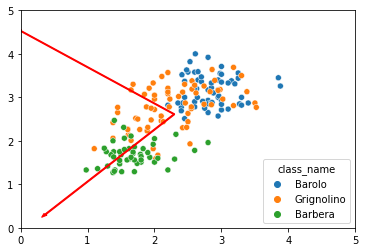

In [59]:
sns.scatterplot(
    x = samples[:, 0],
    y = samples[:, 1],
    hue = wines_df.class_name
)

plt.xlim((0, 5))
plt.ylim((0, 5))

plt.arrow(model.mean_[0], model.mean_[1], model.components_[0][0] * 3, model.components_[0][1] * 3, color = "red", width = 0.02)
plt.arrow(model.mean_[0], model.mean_[1], model.components_[1][0] * 3, model.components_[1][1] * 3, color = "red", width = 0.02)

## Intrinsic Dimension

The Intrinsic dimension is the number of features needed to represent approximately the data. It's an essential idea behind dimension reduction as it tells what is the most compact representation of the data. Let's take a look at the iris dataset specifically the versicolor species.

In [33]:
iris = datasets.load_iris()
iris_dataset = pd.DataFrame(np.concatenate([iris.data, iris.target.reshape(-1, 1)], axis=1))
iris_dataset.columns = [*iris.feature_names, 'target']
iris_dataset.target = iris_dataset.target.astype(int)
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
versicolor_df = iris_dataset[iris_dataset.target == 1]
versicolor_df = versicolor_df.drop(columns=["petal length (cm)"])
versicolor_df.head()

,sepal length (cm),sepal width (cm),petal width (cm),target
50,7.0,3.2,1.4,1
51,6.4,3.2,1.5,1
52,6.9,3.1,1.5,1
53,5.5,2.3,1.3,1
54,6.5,2.8,1.5,1


This is a 3d dataset, right ?

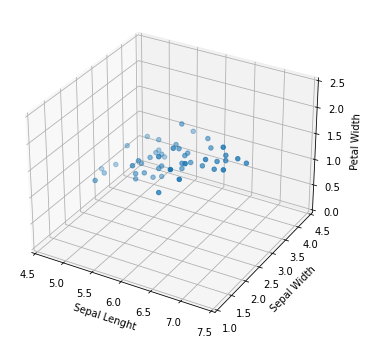

In [42]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

ax.scatter3D(versicolor_df.iloc[:, 0], versicolor_df.iloc[:, 1], versicolor_df.iloc[:, 2])

ax.set_xlim((4.5, 7.5))
ax.set_ylim((1, 4.5))
ax.set_zlim((0, 2.5))

ax.set_xlabel('Sepal Lenght')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width');

The data is 3d but most of the data lie on a 2d plane. So we can approximately compress (represent) the data into only 2 features (Sepal length and Sepal width). It has intrinsic dimension of 2. But how we can identify the intrinsic dimension with needing for scatter plot for example using PCA?

We can do this by fitting the data to a PCA model and count the PCA features that **has only high variance**.

In [43]:
versicolor_pca = PCA()
versicolor_pca.fit(versicolor_df.iloc[:, :-1].values)

PCA()

We can access the variance of the PCA features using the member `explained_variance_` from the fitted `PCA` object.

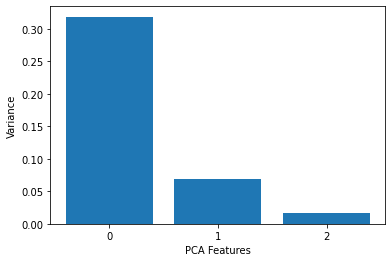

In [49]:
versicolor_pca.explained_variance_
plt.bar(range(3), versicolor_pca.explained_variance_)
plt.xticks(range(3))
plt.xlabel("PCA Features")
plt.ylabel("Variance");

We can also use `explained_variance_ratio_.cumsum()` to check how much variance of the features do I keep if I used the PCA features from beginning until some index.

In [45]:
versicolor_pca.explained_variance_ratio_.cumsum()

array([0.78805674, 0.95737603, 1.        ])

So that means if we used the first 2 PCA features only, we keep 95% of the variance in the data.